In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import operator

from  scipy.stats import chi2_contingency
from util.api import calculate_bottom_dict, get_lts_list
%matplotlib inline
plt.style.use('classic')

In [2]:
lts_list = get_lts_list()
df_list = []
df_by_category_list = []

for idx, lts in enumerate(lts_list):
    df = pd.read_pickle(f'../../data/Dfs/lts-{lts}/lts-{lts}.df')
    df_list.append(df)
    
for idx, lts in enumerate(lts_list):
    df = pd.read_pickle(f'../../data/Dfs/lts-{lts}/lts-{lts}-by-category.df')
    df_by_category_list.append(df)

# RQ0. Distribution
​
In this section, we respond the following two questions:
​
- How are packages distributed in stackage?
- How are packages using mtl distributed in Stackage?
​
For this, we make the following graphs
​
1. Line graph that shows the number of packets for each published snapshot over time
2. Bar graph that shows the evolution of the main categories of the packages
3. Bar graph that shows the evolution of the stabilities of the packages
4. Bar graph that shows the evolution of the main categories of the packages that depend of `mtl`
5. Bar graph that shows the evolution of the stabilities of the packages that depend of `mtl`
​
## RQ0. 3 - Bar graph that shows the evolution of the stabilities of the packages

In [3]:
categories = ['data', 'web', 'control', 'text', 'network']
data = {
    'data': [],
    'web': [],
    'control': [],
    'text': [],
    'network': []
}
count_pkgs = {
    'data': [],
    'web': [],
    'control': [],
    'text': [],
    'network': []
}
df_by_cat = []
for idx, df in enumerate(df_by_category_list):
    aux_df = df[['package', 'category', 'mtl-direct']]
    aux_df = aux_df[aux_df['mtl-direct'] == 1].groupby(['category']).count().reset_index().rename(columns={"package": "count"})   
    aux_df.loc[:, 'version'] = lts_list[idx]
    df_by_cat.append(aux_df.sort_values(by=['count'], ascending=False))

for category in categories:
    for idx, df in enumerate(df_by_category_list):
        total_pkgs = len(df_by_category_list[idx])
        aux = int(df_by_cat[idx][df_by_cat[idx]['category'] == category]['count']) * 100 / total_pkgs   

        count = int(df_by_cat[idx][df_by_cat[idx]['category'] == category]['count']) 
        count_pkgs[category].append(count)
        data[category].append(aux)
others = []
per_others = []
for idx, lts in enumerate(lts_list):
    count = 0
    for category in count_pkgs:
        count += count_pkgs[category][idx]
    
    others.append(len(df_by_category_list[idx]) - count)
    per_others.append((len(df_by_category_list[idx]) - count) * 100 / len(df_by_category_list[idx]))

data['others'] = per_others
count_pkgs['others'] = others

In [4]:
len(data['others'])

20

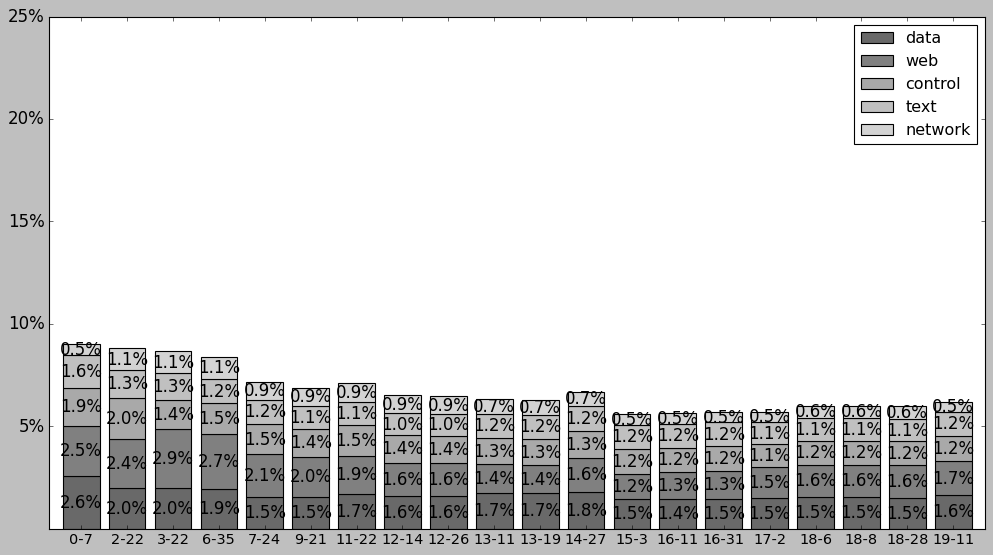

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
ax.margins(0.015) 
plt.subplots_adjust(right=1.1)
nom_cat = []
colors = ['dimgrey', 'grey', 'darkgrey', 'silver', 'lightgrey']
for idx, cat in enumerate(categories):
    nom_cat.append(cat)
    bar = ax.bar(x=lts_list, height=data[cat], bottom=calculate_bottom_dict(data, nom_cat, idx), width=.8, color=colors[idx], align='center', label=categories[idx])
    ax.bar_label(bar, labels=list(map(lambda per: f"{round(per,1)}%",data[cat])), label_type='center', color='black',fontsize=15)

ax.legend(loc='upper right', fontsize='large')
ax.set_xticks(lts_list)
ax.set_xticklabels(lts_list,fontsize=13)
ax.set_yticks([5,10, 15, 20, 25])
ax.set_yticklabels(['5%','10%', '15%','20%', '25%'],fontsize=15)

plt.savefig("../../graphs/rq0-3.pdf", format='pdf', bbox_inches='tight')
plt.show()